In [76]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('../raw_data/cars_india.csv')
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


## Data Cleaning

In [78]:
# Drop all rows that have NaN/missing values
df.dropna(inplace=True)

In [79]:
# Convert the price of the cars from Rupees to USD
df['Price'] = df['Price'] * 0.012

In [80]:
# Convert the odometer reading from km to miles
df['Kilometer'] = df['Kilometer'] * 0.621

In [81]:
# Remove the 'cc' at the end of every engine displacement number
# And convert it from cubic centimeters to liters
df['Engine'] = df['Engine'].map(lambda i: str(i).rstrip(' cc'))
df['Engine'] = pd.to_numeric(df['Engine'])
df['Engine'] = df['Engine'] * 0.001

In [82]:
# Split the 'Max Power' column into 2 columns (Horsepower and torque)
# And drop the original 'Max Power' column
df[['Horsepower', 'HP RPM']] = df['Max Power'].str.split('@', expand=True)
df.drop('Max Power', inplace=True, axis=1)

In [83]:
# Drop the ' bhp' and ' rpm' from the two new columns
df['Horsepower'] = df['Horsepower'].map(lambda i: str(i).rstrip(' bhp'))
df['HP RPM'] = df['HP RPM'].map(lambda i: str(i).rstrip(' rpm'))

In [84]:
# Do the exact same thing for the 'Max Torque' column
df[['Torque', 'Torque RPM']] = df['Max Torque'].str.split('@', expand=True)
df.drop('Max Torque', inplace=True, axis=1)

df['Torque'] = df['Torque'].map(lambda i: str(i).rstrip(' Nm'))
df['Torque RPM'] = df['Torque RPM'].map(lambda i: str(i).rstrip(' rpm'))

In [85]:
df = df.drop(columns=['Model'])

In [86]:
labels = ['very low', 'low', 'medium', 'high', 'very high']
boundaries = [0, 10000, 20000, 30000, 40000, 1000000]
df['Price'] = pd.cut(df['Price'], bins=boundaries, labels=labels, include_lowest=True)

## EDA

Text(0.5, 0, 'Make')

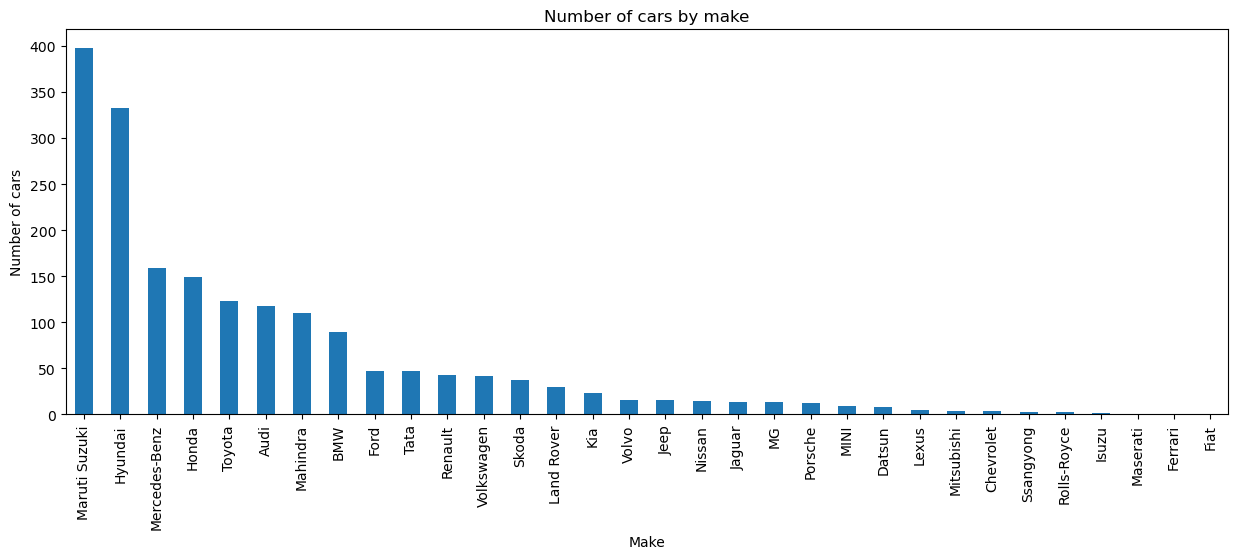

In [87]:
df['Make'].value_counts().nlargest(40).plot(kind='bar', figsize=(15,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

Text(0.5, 0, 'Location')

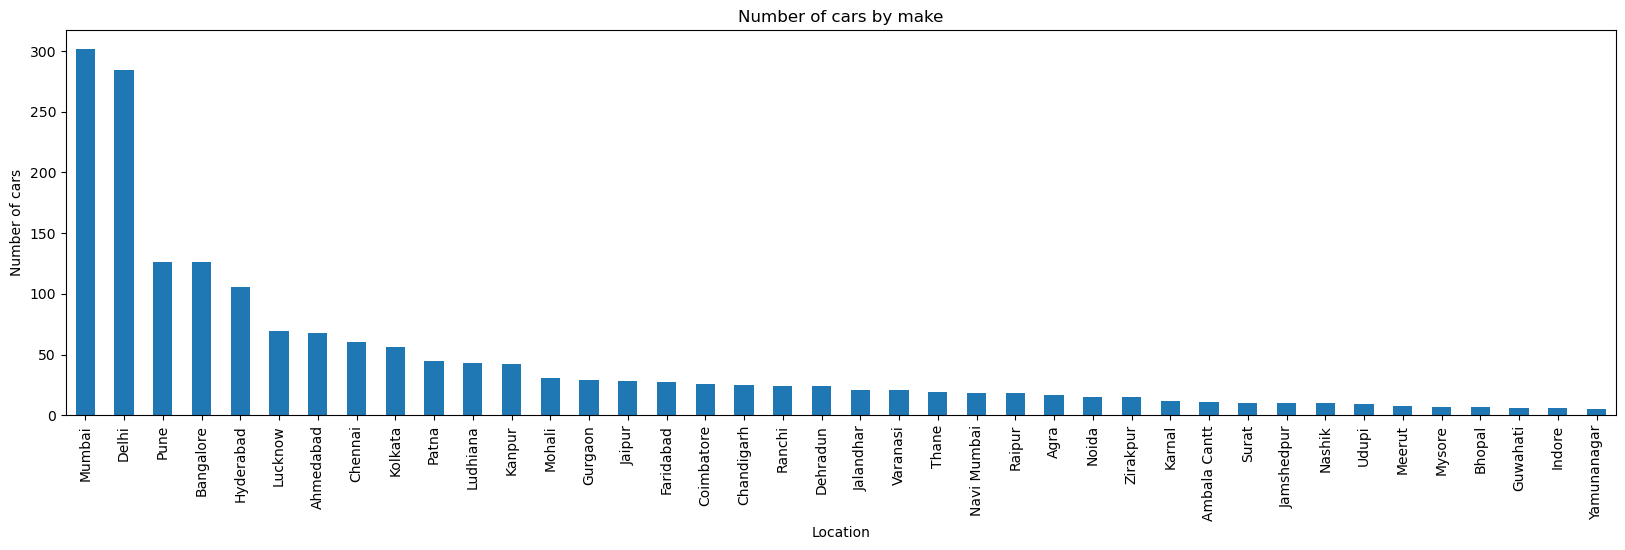

In [88]:
df['Location'].value_counts().nlargest(40).plot(kind='bar', figsize=(20, 5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Location')

Text(0.5, 0, 'Transmission')

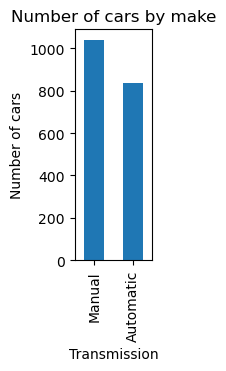

In [89]:
df['Transmission'].value_counts().nlargest(40).plot(kind='bar', figsize=(1, 3))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Transmission')

Text(0.5, 0, 'Fuel Type')

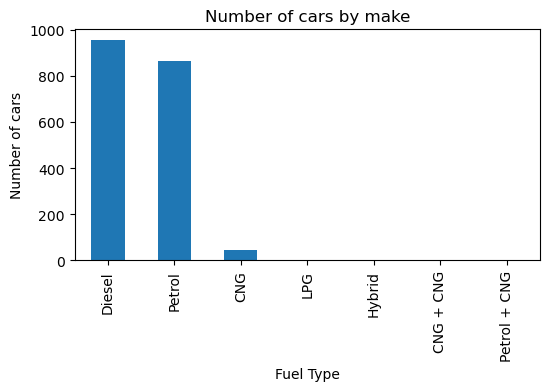

In [90]:
df['Fuel Type'].value_counts().nlargest(40).plot(kind='bar', figsize=(6, 3))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Fuel Type')

Text(0.5, 0, 'Color')

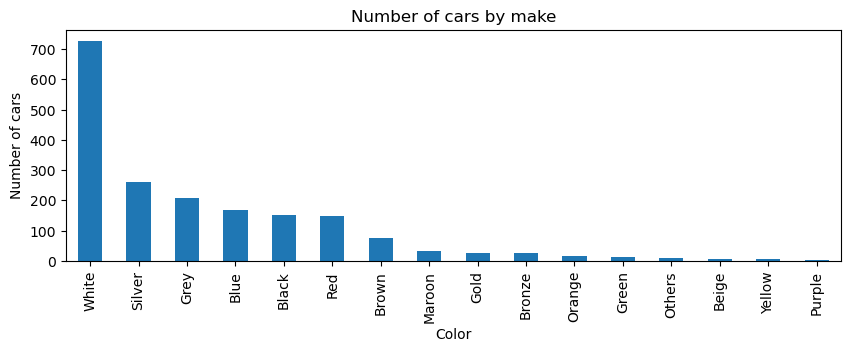

In [91]:
df['Color'].value_counts().nlargest(40).plot(kind='bar', figsize=(10, 3))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Color')

Text(0.5, 0, 'Owner')

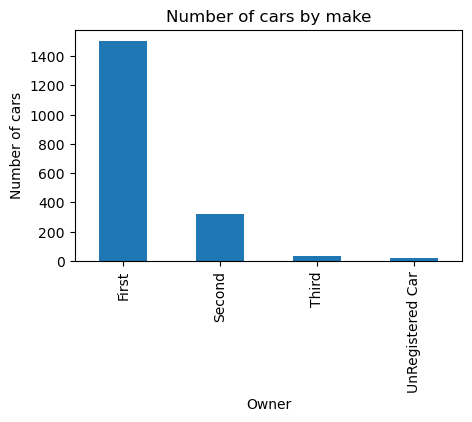

In [92]:
df['Owner'].value_counts().nlargest(40).plot(kind='bar', figsize=(5, 3))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Owner')

Text(0.5, 0, 'Fuel Tank Capacity')

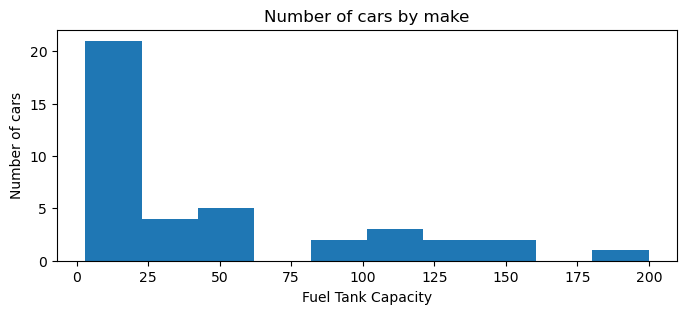

In [93]:
df['Fuel Tank Capacity'].value_counts().nlargest(40).plot(kind='hist', figsize=(8, 3))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Fuel Tank Capacity')

Text(0.5, 0, 'Seller Type')

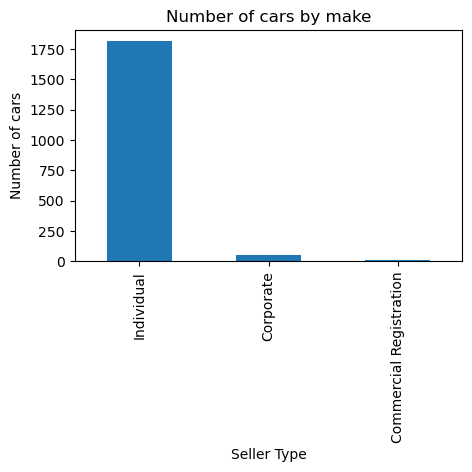

In [94]:
df['Seller Type'].value_counts().nlargest(40).plot(kind='bar', figsize=(5, 3))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Seller Type')

## Label Encoding of non-numeric columns

In [95]:
label_encodings_file = open("../clean_data/india_label_encodings.txt", "w")

In [96]:
le = LabelEncoder()
le.fit(df['Make'])
le_make_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
df['Make'] = le.transform(df['Make'])

label_encodings_file.write("Make: \n")
label_encodings_file.write(str(le_make_mapping))

456

In [97]:
le = LabelEncoder()
le.fit(df['Fuel Type'])
le_make_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
df['Fuel Type'] = le.transform(df['Fuel Type'])

label_encodings_file.write("\n\nFuel Type: \n")
label_encodings_file.write(str(le_make_mapping))

94

In [98]:
le = LabelEncoder()
le.fit(df['Location'])
le_make_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
df['Location'] = le.transform(df['Location'])

label_encodings_file.write("\n\nLocation: \n")
label_encodings_file.write(str(le_make_mapping))

1160

In [99]:
le = LabelEncoder()
le.fit(df['Color'])
le_make_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
df['Color'] = le.transform(df['Color'])

label_encodings_file.write("\n\nColor: \n")
label_encodings_file.write(str(le_make_mapping))

200

In [100]:
le = LabelEncoder()
le.fit(df['Owner'])
le_make_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
df['Owner'] = le.transform(df['Owner'])

label_encodings_file.write("\n\nOwner: \n")
label_encodings_file.write(str(le_make_mapping))

60

In [101]:
le = LabelEncoder()
le.fit(df['Transmission'])
le_make_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
df['Transmission'] = le.transform(df['Transmission'])

label_encodings_file.write("\n\nTransmission: \n")
label_encodings_file.write(str(le_make_mapping))

29

In [102]:
le = LabelEncoder()
le.fit(df['Drivetrain'])
le_make_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
df['Drivetrain'] = le.transform(df['Drivetrain'])

label_encodings_file.write("\n\nDrivetrain: \n")
label_encodings_file.write(str(le_make_mapping))

30

In [103]:
le = LabelEncoder()
le.fit(df['Seller Type'])
le_make_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
df['Seller Type'] = le.transform(df['Seller Type'])

label_encodings_file.write("\n\nSeller Type: \n")
label_encodings_file.write(str(le_make_mapping))

63

In [104]:
price_map = {'very low': 0, 'low': 1, 'medium': 2, 'high': 3, 'very high': 4}
df['Price'] = df['Price'].map(price_map)

label_encodings_file.write("\n\nPrice: \n")
label_encodings_file.write(str(price_map))

65

In [105]:
label_encodings_file.close()
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)

In [106]:
# Convert all columns to numeric
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [107]:
df.dropna(inplace=True, how='any')

In [108]:
df.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Horsepower,HP RPM,Torque,Torque RPM
0,7,0,2017,54120.15,5,1,56,7,0,1,...,1,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500
1,18,0,2014,46575.00,2,1,40,14,1,2,...,1,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000
2,8,0,2011,41607.00,5,1,39,8,0,2,...,1,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.7619,4000
3,29,0,2019,23287.50,5,1,41,12,0,2,...,1,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200
4,29,2,2018,42849.00,2,1,45,7,0,2,...,2,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0000,1400


In [109]:
df.to_csv('../clean_data/cars_india_clean.csv', index=False)

Text(0.5, 0, 'Price')

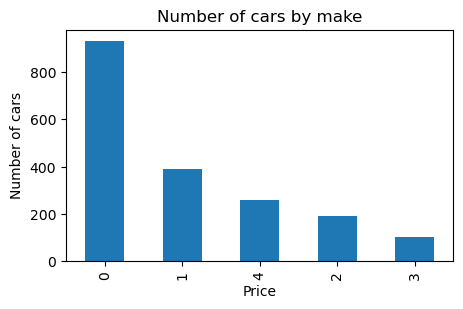

In [111]:
df['Price'].value_counts().nlargest(40).plot(kind='bar', figsize=(5, 3))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Price')

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Horsepower,HP RPM,Torque,Torque RPM
Make,1.000000,-0.084286,0.022668,0.049498,-0.014460,0.112940,0.036343,0.022737,0.007571,-0.044940,...,0.136873,-0.005299,-0.052218,0.232013,0.223627,0.025365,-0.089769,-0.069229,-0.048751,-0.085873
Price,-0.084286,1.000000,0.389189,-0.152564,-0.259347,-0.646063,-0.148283,-0.153218,0.046809,-0.075570,...,-0.059930,0.705071,0.703400,0.153193,0.092833,0.700231,0.783087,-0.402870,0.794589,-0.490647
Year,0.022668,0.389189,1.000000,-0.291737,0.006945,-0.170027,-0.062230,-0.070792,-0.234279,-0.040106,...,-0.032910,0.084772,0.182503,0.126697,-0.000514,0.044511,0.099874,-0.046239,0.091631,-0.121097
Kilometer,0.049498,-0.152564,-0.291737,1.000000,-0.174021,0.105132,0.030035,0.059529,0.065476,0.021794,...,-0.002292,0.037919,0.008444,0.085782,0.111201,0.052531,-0.032862,-0.154342,0.040237,-0.086192
Fuel Type,-0.014460,-0.259347,0.006945,-0.174021,1.000000,0.057462,0.063901,-0.027786,-0.057010,-0.019457,...,-0.003137,-0.313529,-0.345251,-0.341481,-0.292191,-0.409347,-0.169789,0.810825,-0.505503,0.670511
Transmission,0.112940,-0.646063,-0.170027,0.105132,0.057462,1.000000,0.096189,0.155349,-0.083924,0.065716,...,0.060971,-0.536716,-0.512415,0.052473,0.039494,-0.505873,-0.596086,0.186641,-0.561844,0.275229
Location,0.036343,-0.148283,-0.062230,0.030035,0.063901,0.096189,1.000000,0.021785,-0.042387,-0.081920,...,0.034923,-0.092645,-0.115175,0.000445,0.029012,-0.100013,-0.123004,0.069878,-0.124692,0.096187
Color,0.022737,-0.153218,-0.070792,0.059529,-0.027786,0.155349,0.021785,1.000000,-0.001332,0.006740,...,0.033219,-0.144105,-0.138432,0.001763,0.038381,-0.118950,-0.157759,-0.006988,-0.119214,0.022415
Owner,0.007571,0.046809,-0.234279,0.065476,-0.057010,-0.083924,-0.042387,-0.001332,1.000000,0.056260,...,0.003112,0.093116,0.048296,-0.004676,0.021476,0.096859,0.121863,-0.083028,0.111872,-0.098567
Seller Type,-0.044940,-0.075570,-0.040106,0.021794,-0.019457,0.065716,-0.081920,0.006740,0.056260,1.000000,...,0.008324,-0.052045,-0.043622,0.021566,0.029286,-0.038628,-0.082022,-0.016274,-0.055462,0.015451


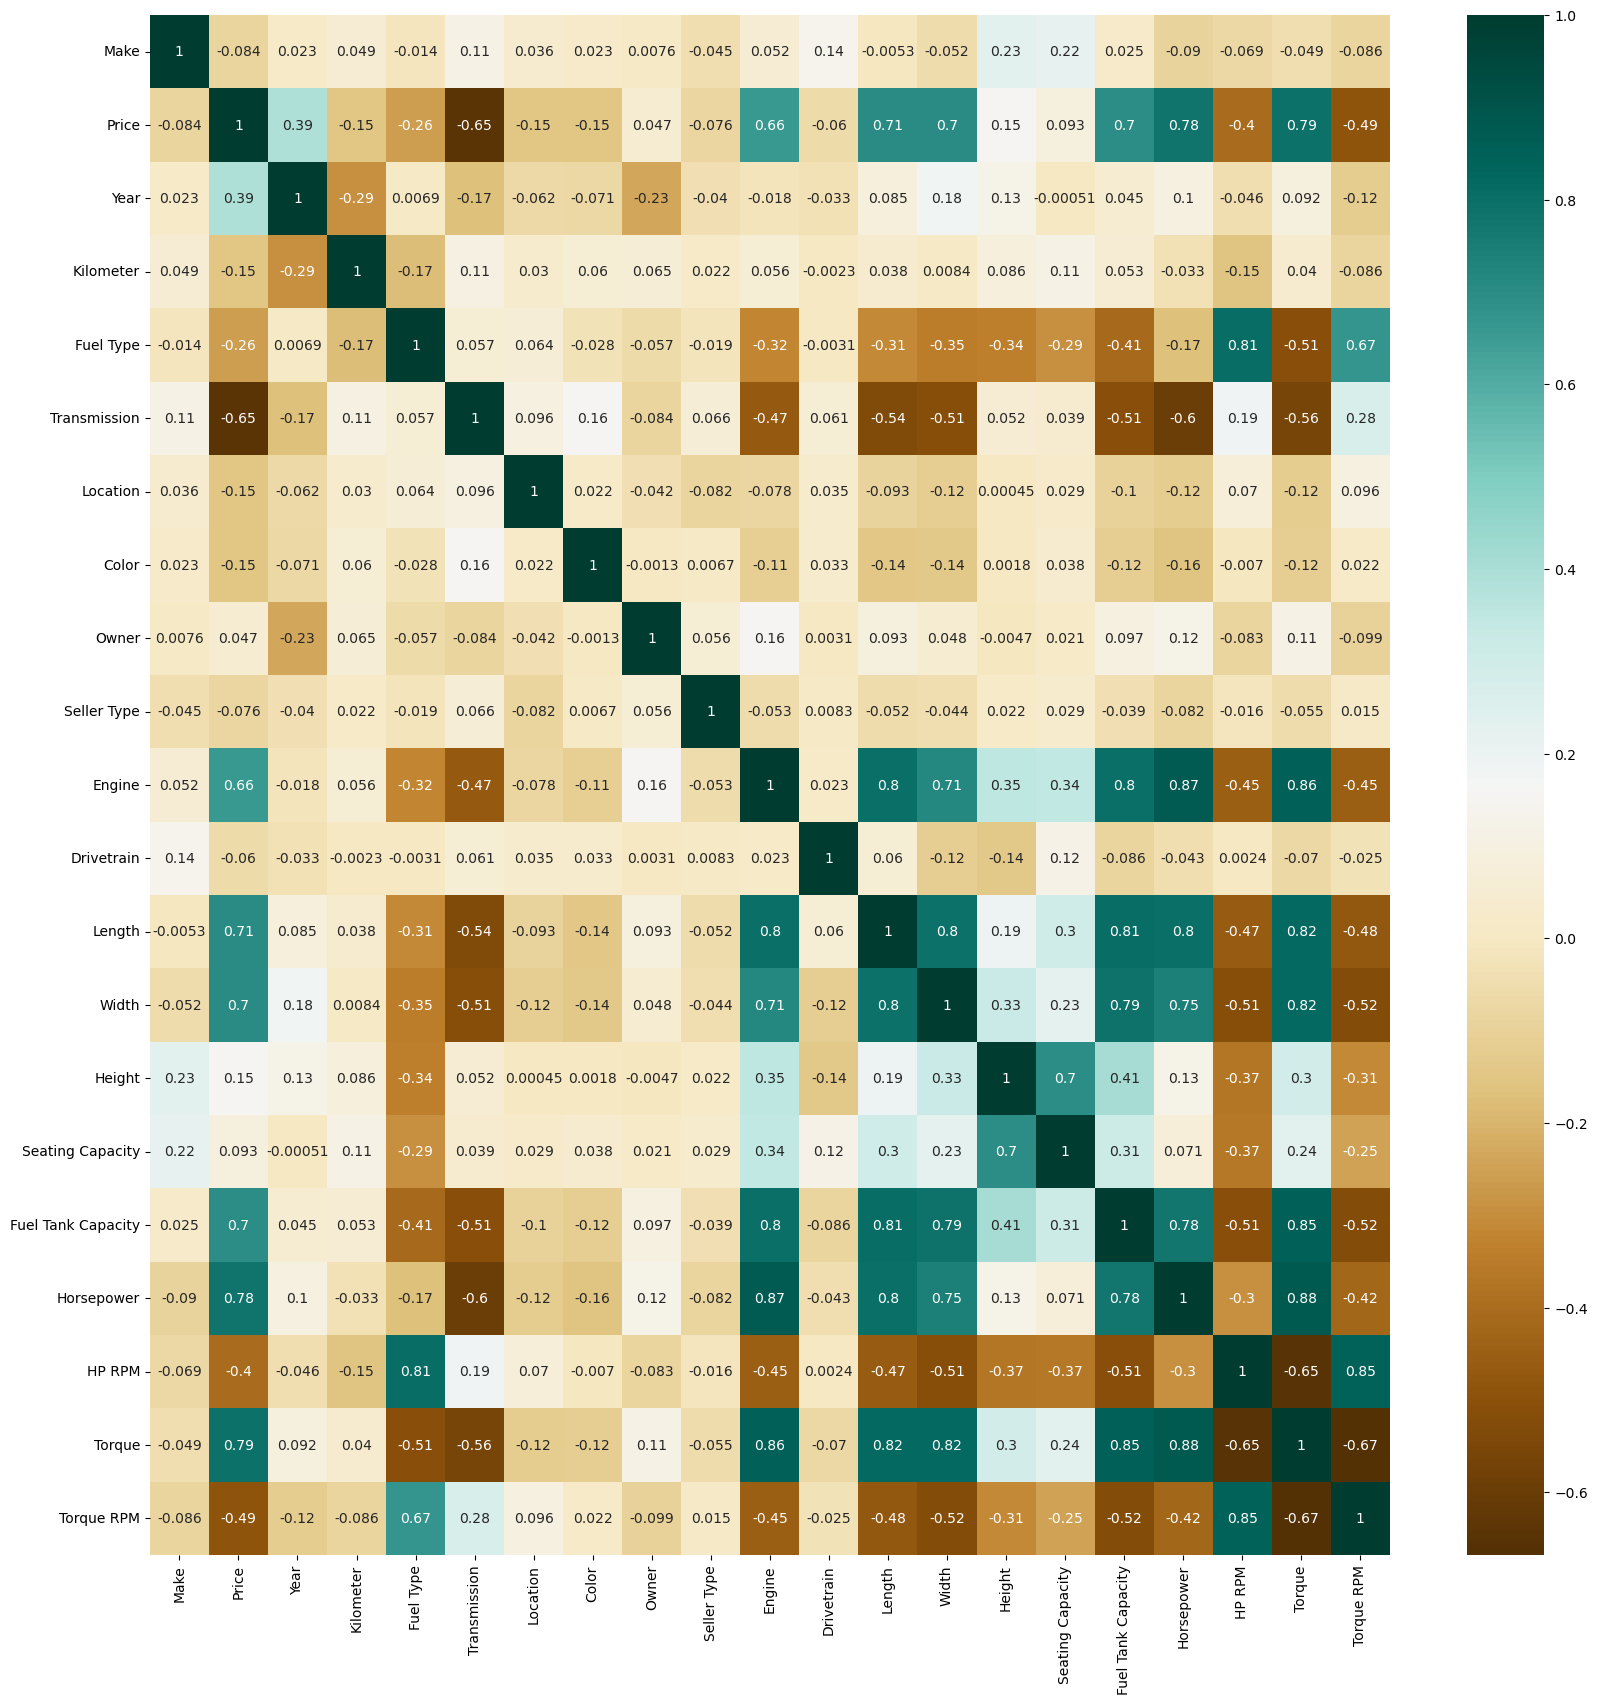

: 

In [112]:
plt.figure(figsize=(20,20))
corr_fig = df.corr()
sns.heatmap(corr_fig,cmap="BrBG",annot=True)
corr_fig